<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Introduction 4 - Reproducibility Assignment - Machine Learning </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060">Objectives:</span>

* Recreate the plots from the blog located [here](https://medium.datadriveninvestor.com/hr-based-ml-project-employee-resign-prediction-4fecfee5f294) (This will take time)
* Apply only the Logistic Regression to the dataset in the blog
* Achieve the same accuracy and sensitivity seen in the blog
* Based on your understanding of sensitivity and specificity which algorithm would you pick based on the report in the blog?
* Include all code, plots, models, and answers in the same notebook and submit them to the Learn Platform

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
from matplotlib.pyplot import figure
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [251]:
# data loading
manager =pd.read_csv('./data/manager_survey_data.csv')
general =pd.read_csv('./data/general_data.csv')
employee=pd.read_csv('./data/employee_survey_data.csv')

### <span style="color:#EF7C8E">1. Data Preprocessing: </span>

In [252]:
manager.info()
general.info()
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4

In [253]:
# merge manager, general and employee datasets on EmployeeID
df=pd.concat(
    (iDF.set_index('EmployeeID') for iDF in [manager, general, employee]),
    axis=1, join='inner'
).reset_index()

In [256]:
df.head()

EmployeeID  JobInvolvement  PerformanceRating  Age Attrition  \
0           1               3                  3   51        No   
1           2               2                  4   31       Yes   
2           3               3                  3   32        No   
3           4               2                  3   38        No   
4           5               3                  3   32        No   

      BusinessTravel              Department  DistanceFromHome  Education  \
0      Travel_Rarely                   Sales                 6          2   
1  Travel_Frequently  Research & Development                10          1   
2  Travel_Frequently  Research & Development                17          4   
3         Non-Travel  Research & Development                 2          5   
4      Travel_Rarely  Research & Development                10          1   

  EducationField  ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  Life Sciences  ...              8                0                1.0   
1  Life Sciences  ...              8                1                6.0   
2          Other  ...              8                3                5.0   
3  Life Sciences  ...              8                3               13.0   
4        Medical  ...              8                2                9.0   

  TrainingTimesLastYear YearsAtCompany  YearsSinceLastPromotion  \
0                     6              1                        0   
1                     3              5                        1   
2                     2              5                        0   
3                     5              8                        7   
4                     2              6                        0   

   YearsWithCurrManager EnvironmentSatisfaction  JobSatisfaction  \
0                     0                     3.0              4.0   
1                     4                     3.0              2.0   
2                     3                     2.0              2.0   
3                     5                     4.0              4.0   
4                     4                     4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0  

[5 rows x 29 columns]

### <span style="color:#EF7C8E">2. Reproducing Plots: </span>

In [82]:
# subsetting data for plotting
attrition_yes_by_gender= df.loc[df['Attrition'] == "Yes", 'Gender'].value_counts()
attrition_yes_by_gender=attrition_yes_by_gender.reindex(index = ['Female','Male'])

Text(0.5, 0, 'Number of People')

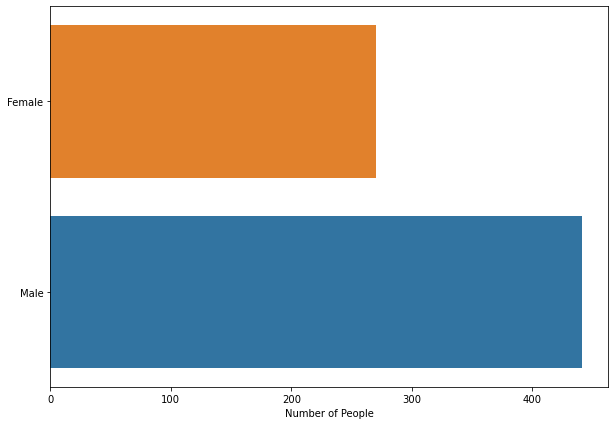

In [83]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x=attrition_yes_by_gender.values, 
                 y=attrition_yes_by_gender.index, 
                 data=df, 
                 palette=["#ff7f0e", '#1f77b4']
                )
ax.set_xlabel('Number of People')

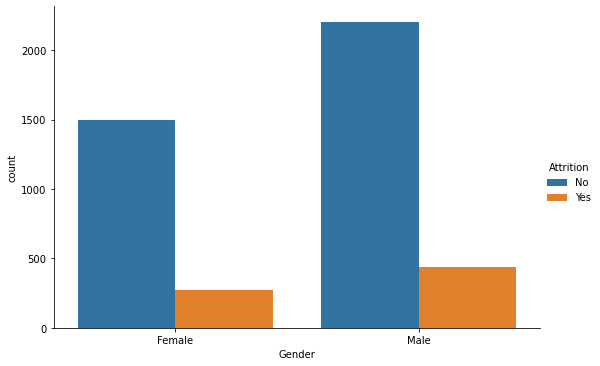

In [257]:
sns.catplot( x='Gender',
             kind="count", 
             hue="Attrition", 
             height=5, 
             aspect=1.5, 
             data=df)

In [178]:
list_of_percentages=[]
list_of_ages=[]
for i in range(18,61): 
    num_leaves=df[(df["Attrition"]=="Yes")&(df["Age"]==i)].shape[0]
    total_emps=df[(df["Age"]==i)].shape[0]
    perc = (num_leaves/total_emps)*100
    list_of_percentages.append(perc)
    list_of_ages.append(i)

Text(0, 0.5, 'Resign Percentage by Age')

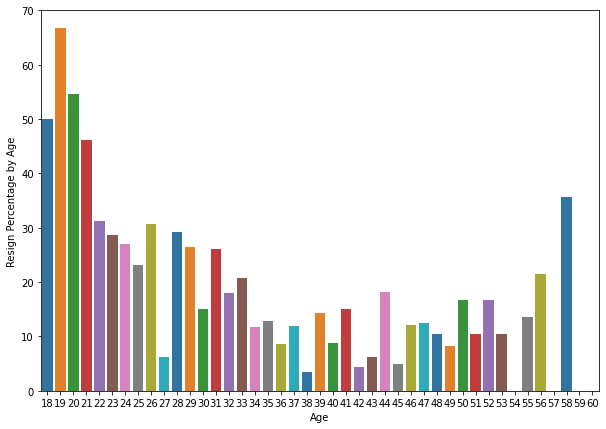

In [190]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x=list_of_ages, 
                 y=list_of_percentages, 
                 palette=['#1f77b4','#ff7f0e','#2ca02c',  '#d62728','#9467bd','#8c564b',
                          '#e377c2','#7f7f7f','#bcbd22','#17becf'])
ax.set_xlabel('Age')
ax.set_ylabel('Resign Percentage by Age')

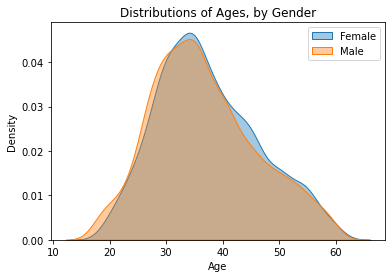

In [339]:
# subset data for plotting
Female_ages= df.loc[df['Gender'] == "Female", 'Age']
Male_ages= df.loc[df['Gender'] == "Male", 'Age']

plt.title("Distributions of Ages, by Gender")
sns.kdeplot(x=Female_ages,label='Female',shade=True,alpha=.4)
sns.kdeplot(x=Male_ages,label='Male',shade=True,alpha=.4)
plt.legend()

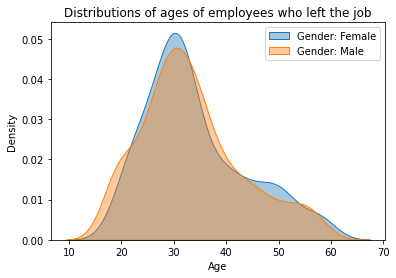

In [351]:
# subset data for plotting
Female_left= df.loc[(df['Gender'] == "Female")&(df['Attrition'] == "Yes"), 'Age']
Male_left= df.loc[(df['Gender'] == "Male")&(df['Attrition'] == "Yes"), 'Age']

plt.title("Distributions of ages of employees who left the job")
sns.kdeplot(x=Female_left,label='Gender: Female',shade=True,alpha=.4)
sns.kdeplot(x=Male_left,label='Gender: Male',shade=True,alpha=.4)
plt.legend()

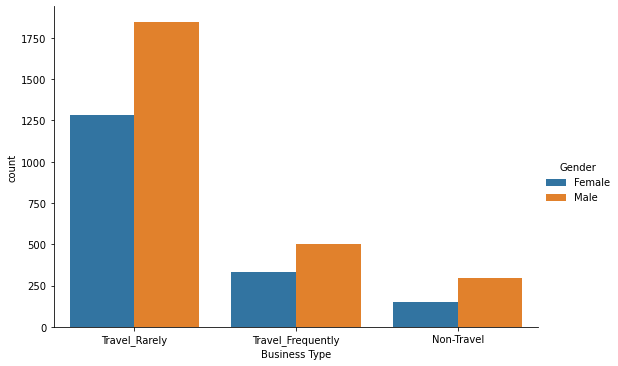

In [244]:
ax=sns.catplot( x='BusinessTravel',
             kind="count", 
             hue="Gender", 
             height=5, 
             aspect=1.5, 
             data=df)
ax.set(xlabel='Business Type', ylabel='count')

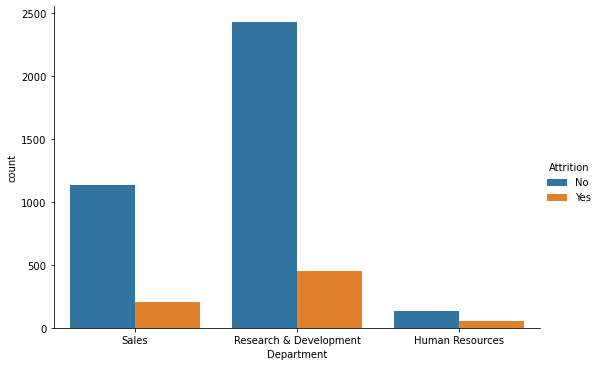

In [246]:
ax=sns.catplot( x='Department',
             kind="count", 
             hue="Attrition", 
             height=5, 
             aspect=1.5, 
             data=df)

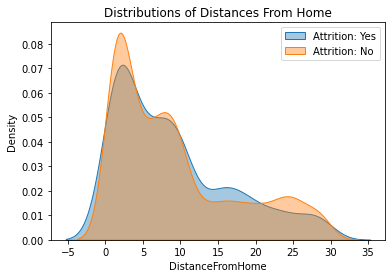

In [350]:
# subset data for plotting
left_distance= df.loc[(df['Attrition'] == "Yes"), 'DistanceFromHome']
stayed_distance= df.loc[(df['Attrition'] == "No"), 'DistanceFromHome']

plt.title("Distributions of Distances From Home")
sns.kdeplot(x=left_distance,label='Attrition: Yes',shade=True,alpha=.4)
sns.kdeplot(x=stayed_distance,label='Attrition: No',shade=True,alpha=.4)
plt.legend()

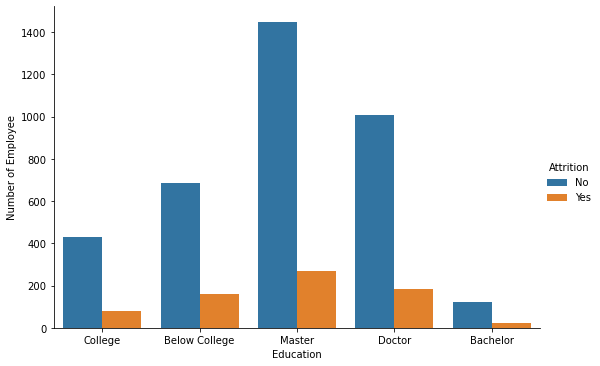

In [273]:
ax=sns.catplot( x='Education',
             kind="count", 
             hue="Attrition", 
             height=5, 
             aspect=1.5, 
             data=df)
ax.set_xticklabels(['College','Below College','Master','Doctor','Bachelor'])
ax.set(xlabel='Education', ylabel='Number of Employee')

<Figure size 864x720 with 0 Axes>

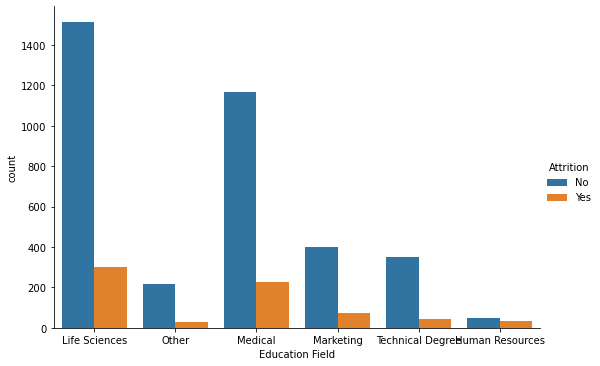

In [272]:
plt.figure(figsize=(12,10))
ax=sns.catplot( x='EducationField',
             kind="count", 
             hue="Attrition", 
             height=5, 
             aspect=1.5, 
             data=df)
ax.set(xlabel='Education Field', ylabel='Number of Employee')

<Figure size 864x720 with 0 Axes>

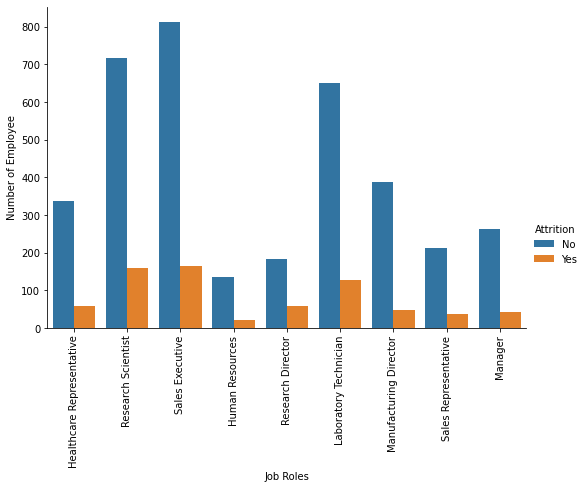

In [279]:
plt.figure(figsize=(12,10))
ax=sns.catplot( x='JobRole',
             kind="count", 
             hue="Attrition", 
             height=5, 
             aspect=1.5, 
             data=df)
ax.set(xlabel='Job Roles', ylabel='Number of Employee')
plt.xticks(rotation = 90)
plt.show()

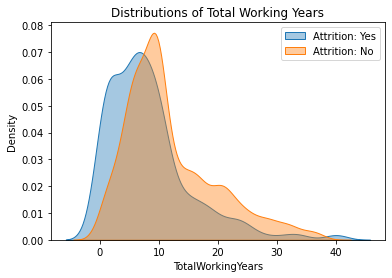

In [349]:
# subset data for plotting
left_working_hrs= df.loc[(df['Attrition'] == "Yes"), 'TotalWorkingYears']
stayed_working_hrs= df.loc[(df['Attrition'] == "No"), 'TotalWorkingYears']

plt.title("Distributions of Total Working Years")
sns.kdeplot(x=left_working_hrs,label='Attrition: Yes',shade=True,alpha=.4)
sns.kdeplot(x=stayed_working_hrs,label='Attrition: No',shade=True,alpha=.4)
plt.legend()

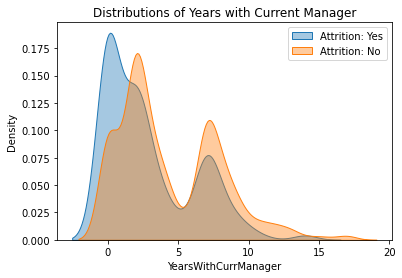

In [348]:
# subset data for plotting
left_currManager= df.loc[(df['Attrition'] == "Yes"), 'YearsWithCurrManager']
stayed_currManager= df.loc[(df['Attrition'] == "No"), 'YearsWithCurrManager']

plt.title("Distributions of Years with Current Manager")
sns.kdeplot(x=left_currManager,label='Attrition: Yes',shade=True,alpha=.4)
sns.kdeplot(x=stayed_currManager,label='Attrition: No',shade=True,alpha=.4)
plt.legend()

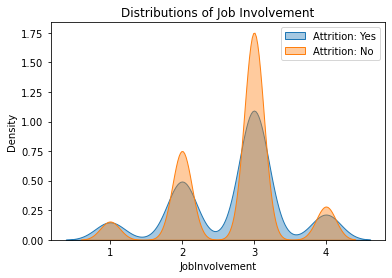

In [346]:
# subset data for plotting
left_jobInvolv= df.loc[(df['Attrition'] == "Yes"), 'JobInvolvement']
stayed_jobInvolv= df.loc[(df['Attrition'] == "No"), 'JobInvolvement']

plt.title("Distributions of Job Involvement")
sns.kdeplot(x=left_jobInvolv,label='Attrition: Yes',shade=True,alpha=.4)
sns.kdeplot(x=stayed_jobInvolv,label='Attrition: No',shade=True,alpha=.4)
plt.legend()

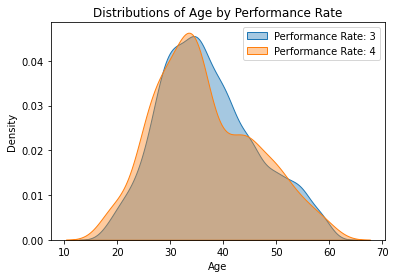

In [347]:
# subset data for plotting
perf_3_age= df.loc[(df['PerformanceRating'] == 3), 'Age']
perf_4_age= df.loc[(df['PerformanceRating'] == 4), 'Age']

plt.title("Distributions of Age by Performance Rate")
sns.kdeplot(x=perf_3_age,label='Performance Rate: 3',shade=True,alpha=.4)
sns.kdeplot(x=perf_4_age,label='Performance Rate: 4',shade=True,alpha=.4)
plt.legend()

In [294]:
list_of_ratios=[]
list_of_work_bal=[]
for i in range(1,5): 
    num_leaves=df[(df["Attrition"]=="Yes")&(df["WorkLifeBalance"]==i)].shape[0]
    total_emps=df[(df["WorkLifeBalance"]==i)].shape[0]
    perc = (num_leaves/total_emps)*100
    list_of_ratios.append(perc)
    list_of_work_bal.append(i)

Text(0.5, 1.0, 'Resign Ratios by Work Life Balance(%)')

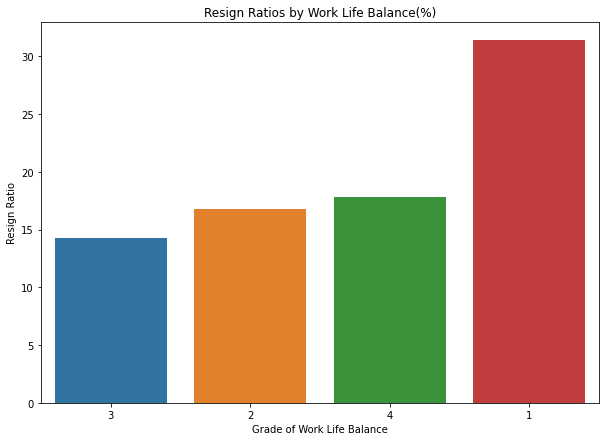

In [298]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x=list_of_work_bal, 
                 y=list_of_ratios, 
                 order=[3,2,4,1]
)
ax.set_xlabel('Grade of Work Life Balance')
ax.set_ylabel('Resign Ratio')
plt.title("Resign Ratios by Work Life Balance(%)")

### <span style="color:#EF7C8E">3. Applying Logistic Regression: </span>

In [402]:
# DATA CLEANING 

# drop the rows with NA's
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# convert categorical data into dummy/indicator variables
df.Attrition = pd.get_dummies(df.Attrition, drop_first = True)
df = pd.get_dummies(df)

In [363]:
df.head()

JobInvolvement  PerformanceRating  Age  Attrition  DistanceFromHome  \
0               3                  3   51          0                 6   
1               2                  4   31          1                10   
2               3                  3   32          0                17   
3               2                  3   38          0                 2   
4               3                  3   32          0                10   

   JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0         1         131160                 1.0                 11   
1         1          41890                 0.0                 23   
2         4         193280                 1.0                 15   
3         3          83210                 3.0                 11   
4         1          23420                 4.0                 12   

   StockOptionLevel  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0                 0  ...                              0                0   
1                 1  ...                              0                0   
2                 3  ...                              0                0   
3                 3  ...                              0                0   
4                 2  ...                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           1                        0   
2                           0                        1   
3                           0                        0   
4                           0                        1   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      1                     0  
1                      0                     1  
2                      1                     0  
3                      1                     0  
4                      0                     1  

[5 rows x 44 columns]

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis = 1) #feature matrix
y = df.Attrition # target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

In [407]:
# creating logistic regression object
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

# calculate test score
from sklearn import metrics

model = model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

Best Penalty: l2
Best C: 2.7825594022071245
Test Accuracy: 0.8488372093023255
Test Sensitivity: 0.17266187050359713


### <span style="color:#EF7C8E">4. Sensitivity VS. Specificity: </span>
Based on your understanding of sensitivity and specificity which algorithm would you pick based on the report in the blog?

**Sensitivity** is how many of the True positives I was able to capture from the total positives of my dataset.

**Specificity** is how many of the True negatives I was able to capture from the total negatives of my dataset.

**Formulas:**


<div>
<img align="left"  src="./sens.PNG"> 
</div>




#### Examples: 
*In the rain example:* 
* Sensitivity would be how much did I say it rained when it actually rained.
* Specificity would be how much did I say it did not rain when it did not actually rain. 

*In the cancer example:*
* Sensitivity would be how many times did I diagnose the patients with cancer and they actually did have cancer. 
* Specificity would be how many times did I diagnose the patients of not having cancer and they actually did not have cancer. 


*In regards to the blogs algorithms:* 

<img align="left" src="./performance_results.PNG"> 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

* As we can see from the screenshot above, the top two algorithms would be LightGBM and XGBoost as they have an equal highest score in both sensitivity and accuraccy. 
